In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

In [4]:

# Read the data from the specified Excel file
df = pd.read_excel('Fig4_data.xlsx')


In [5]:
cat_col = df.iloc[:, 33]
num_col = np.log10(df.iloc[:, 37])

In [6]:
# Print the names of the selected columns
print(f"Selected columns: Category -> {df.columns[33]}, Numeric -> {df.columns[37]}")


Selected columns: Category -> Organism group, Numeric -> Dosage(Original PCN*Drug_class_count)


In [7]:
print(min(num_col))

-0.15507874312324307


In [8]:
# Create a new DataFrame for plotting
plot_df = pd.DataFrame({
    'Category': cat_col,
    'Numeric': num_col
})

In [9]:
# Filter groups with more than 3 data points
group_counts = plot_df.groupby('Category')['Numeric'].count()
valid_categories = group_counts[group_counts > 3].index
filtered_df = plot_df[plot_df['Category'].isin(valid_categories)]

# Calculate the mean and standard deviation for each valid category
group_stats = filtered_df.groupby('Category')['Numeric'].agg(['mean', 'std'])

# Sort the valid categories by mean values in descending order
sorted_categories = group_stats['mean'].sort_values(ascending=False).index
sorted_group_stats = group_stats.loc[sorted_categories]
# Print the ordered list of organisms
print("\nOrganisms ordered by mean (descending):")
print(sorted_categories.tolist())



Organisms ordered by mean (descending):
['Streptococcus pyogenes', 'Vibrio cholerae', 'Aeromonas hydrophila', 'Pseudomonas putida', 'Neisseria gonorrhoeae', 'Providencia alcalifaciens', 'Serratia marcescens', 'Morganella morganii', 'Listeria monocytogenes', 'Enterobacter chuandaensis', 'Pseudomonas aeruginosa', 'Klebsiella oxytoca', 'Citrobacter freundii', 'Staphylococcus aureus', 'Staphylococcus pseudintermedius', 'Enterobacter hormaechei', 'Enterococcus faecalis', 'Klebsiella pneumoniae', 'Enterobacter kobei', 'Salmonella enterica', 'Enterobacter cloacae', 'E.coli and Shigella', 'Enterobacter asburiae', 'Acinetobacter baumannii', 'Enterococcus faecium', 'Enterobacter bugandensis', 'Enterobacter roggenkampii', 'Bacillus cereus group', 'Clostridium perfringens', 'Campylobacter jejuni']


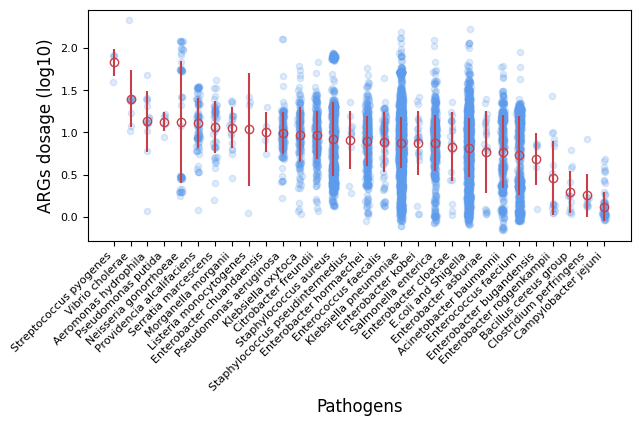

In [10]:

# Create a plot of mean with error bars
plt.figure(figsize=(7, 3))
x_pos = np.arange(len(sorted_categories))
plt.errorbar(x_pos, sorted_group_stats['mean'], yerr=sorted_group_stats['std'], 
             fmt='o',fillstyle='none', capsize=0, color='#C74049', label='Mean with Std Dev')

# Overlay original data points
for i, category in enumerate(sorted_categories):
    category_data = filtered_df[filtered_df['Category'] == category]['Numeric']
    x_jitter = np.random.normal(i, 0.05, len(category_data))  # Add jitter to x - values
    plt.scatter(x_jitter, category_data, color='#5D9CEC', alpha=0.2, s=20)

# Set x-axis labels and tick positions
plt.xticks(x_pos, sorted_categories,fontsize=8)
plt.yticks(fontsize=8)
# Remove grid lines
plt.grid(False)
#plt.ylim(0,30)
plt.xlabel('Pathogens',fontsize=12)
plt.ylabel('ARGs dosage (log10)',fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.savefig('Visualization_4d2.pdf',bbox_inches='tight')
